# Analyzing Parkinson's Disease Dataset


This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with **Parkinson's disease (PD)**. Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "**status**" column which is set to 0 for healthy and 1 for PD.

In [1]:
!ls

parkinsons.txt	sample_data


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('parkinsons.txt',sep=',')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


**Attribute Information:**

Matrix column entries (attributes):

**name -** ASCII subject name and recording number

**MDVP:Fo(Hz) -** Average vocal fundamental frequency

**MDVP:Fhi(Hz) -** Maximum vocal fundamental frequency

**MDVP:Flo(Hz) -** Minimum vocal fundamental frequency

**MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP -** Several 
measures of variation in fundamental frequency

**MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude

**NHR,HNR -** Two measures of ratio of noise to tonal components in the voice

**status -** Health status of the subject (one) - Parkinson's, (zero) - healthy

**RPDE,D2 -** Two nonlinear dynamical complexity measures

**DFA -** Signal fractal scaling exponent

**spread1,spread2,PPE -** Three nonlinear measures of fundamental frequency variation 

In [3]:
# Creating a copy of dataframe fi=or future reference
df_c=df.copy()

In [4]:
# To check if the dataframe contains missing values
df_c[df_c.drop('name',axis=1)<0].count()

name                  0
MDVP:Fo(Hz)           0
MDVP:Fhi(Hz)          0
MDVP:Flo(Hz)          0
MDVP:Jitter(%)        0
MDVP:Jitter(Abs)      0
MDVP:RAP              0
MDVP:PPQ              0
Jitter:DDP            0
MDVP:Shimmer          0
MDVP:Shimmer(dB)      0
Shimmer:APQ3          0
Shimmer:APQ5          0
MDVP:APQ              0
Shimmer:DDA           0
NHR                   0
HNR                   0
status                0
RPDE                  0
DFA                   0
spread1             195
spread2               0
D2                    0
PPE                   0
dtype: int64

# Exploratory Data Analysis

We will look in the below cells, the **distribution of values** of various features in the dataset.

In [5]:
df1=df[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','status']]
df1.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),status
0,119.992,157.302,74.997,1
1,122.400,148.650,113.819,1
2,116.682,131.111,111.555,1
3,116.676,137.871,111.366,1
4,116.014,141.781,110.655,1


In [6]:
df1_mlt=pd.melt(df1,value_vars=['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)'],var_name='Vocal Fundamental Freq',value_name='Value',id_vars='status')
df1_mlt.head()

,status,Vocal Fundamental Freq,Value
0,1,MDVP:Fo(Hz),119.992
1,1,MDVP:Fo(Hz),122.400
2,1,MDVP:Fo(Hz),116.682
3,1,MDVP:Fo(Hz),116.676
4,1,MDVP:Fo(Hz),116.014


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Vocal Fundamental Frequency')

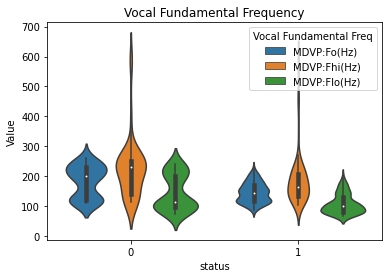

In [7]:
# We will check the distribution of Vocal Fundamental Frequency using ViolinPlot
import seaborn as sns
g=sns.violinplot(data=df1_mlt,x='status',y='Value',hue='Vocal Fundamental Freq')
plt.title('Vocal Fundamental Frequency')

In **ViolinPlot**, the middle white dot represents the white dot. The width of the violinplot at any particular denotes the frequency of value there. The length of the violinplot represents variability. Also if the violin plot is extended very long towards a particular direction(long tail), then there can be outliers present and thus data are skewed due to them.

We see in the above plot that the median values for each category for 0(healthy) is higher than 1s. There are bimodal shape present in some violinplot(eg: **MDVP:Fo(Hz)** for 0) suggesting more values are concentrated in those two regions. The long tails denotes(eg:**MDVP:Fhi(Hz)**) outliers present in data. The variability of values for each category in case of 0 is also greated meaning they have greater range of Vocal Fundamental Frequency

Text(0.5, 1.0, 'Signal Fractal Scaling Exponent')

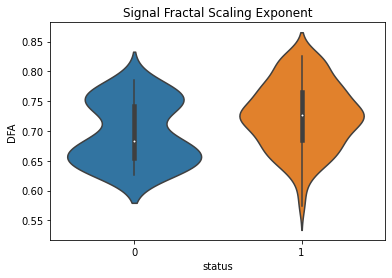

In [8]:
g1=sns.violinplot(data=df,x='status',y='DFA')
plt.title('Signal Fractal Scaling Exponent')

In case of Signal fractal scaling exponent variable, the median value is larger for **1**(**Parkinson-affected**). The most values for 1 is concentrated around 0.73 . In case of 0, the distribution is bimodal with most value concentration(the peaks) towards 0.75 and 0.65.

In [9]:
df2=df[['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA','status']]
df2.head()

,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,status
0,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,1
1,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,1
2,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,1
3,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,1
4,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,1


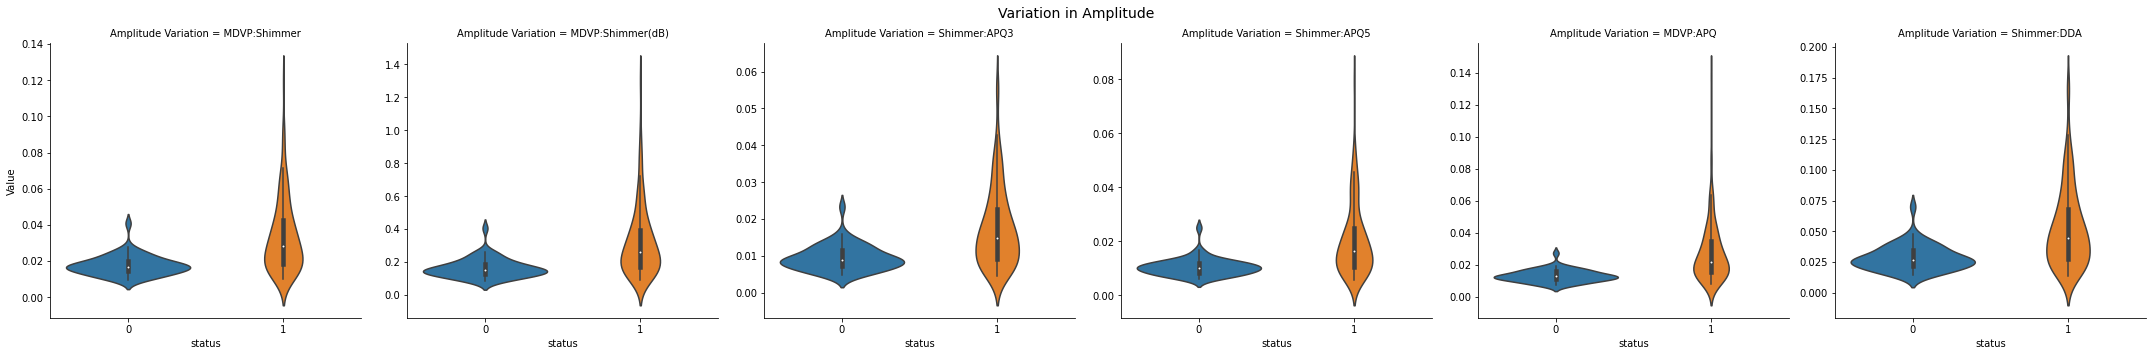

In [10]:
df2_mlt=pd.melt(df2,value_vars=['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'],var_name='Amplitude Variation',value_name='Value',id_vars='status')
#display(df2_mlt.head(3))
g=sns.catplot(kind='violin',x='status',y='Value',col='Amplitude Variation',data=df2_mlt,sharey=False)
g.fig.subplots_adjust(top=0.88)
t=g.fig.suptitle('Variation in Amplitude',fontsize=14)

The above set of violinplot **Several measures of variation in amplitude**. We see that for all types of measures the median values for 1 are higher. Also they have larger variation and outliers. 0s on the other hand had very bulging curve towards a particular value for each plot denoting most values concantrating at that region.

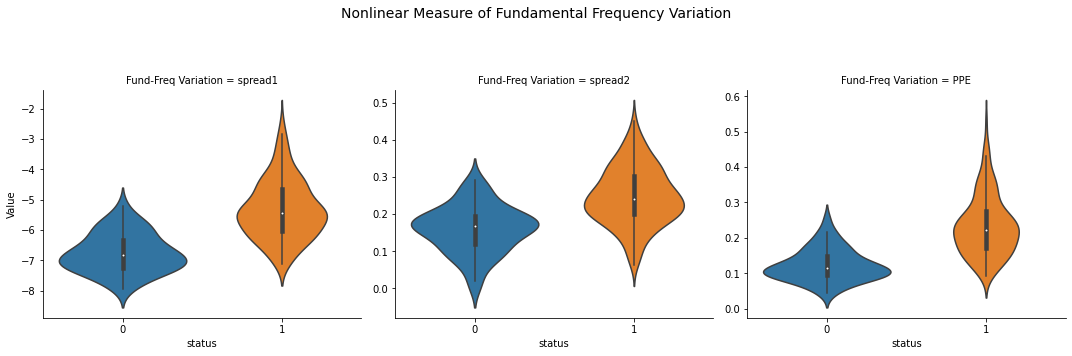

In [11]:
df2=df[['spread1','spread2','PPE','status']]
df2_mlt=pd.melt(df2,value_vars=['spread1','spread2','PPE'],var_name='Fund-Freq Variation',value_name='Value',id_vars='status')
#display(df2_mlt.head(3))
g2=sns.catplot(kind='violin',x='status',y='Value',col='Fund-Freq Variation',data=df2_mlt,sharey=False,)
g2.fig.subplots_adjust(top=0.75)
t=g2.fig.suptitle('Nonlinear Measure of Fundamental Frequency Variation',fontsize=14)

The above violinplot denotes **Three nonlinear measures of fundamental frequency variation**. In all groups, the median of 1s are higher. Thay have larger range of values. O have comparatively smaller range for values and bulged(more concentration) towards a particular value towards each plot.

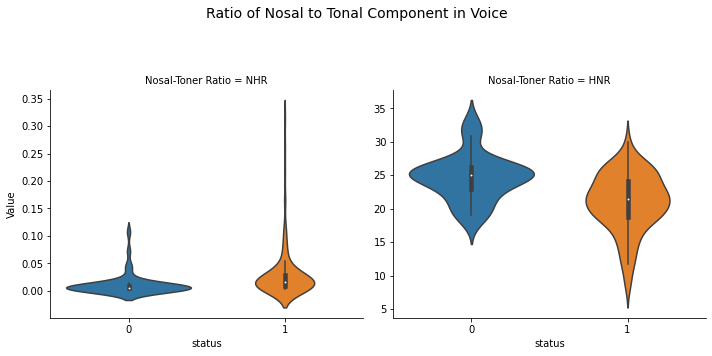

In [12]:
df2=df[['status','NHR','HNR']]
df2_mlt=pd.melt(df2,value_vars=['NHR','HNR'],var_name='Nosal-Toner Ratio',value_name='Value',id_vars='status')
#display(df2_mlt.head(3))
g2=sns.catplot(kind='violin',x='status',y='Value',col='Nosal-Toner Ratio',data=df2_mlt,sharey=False)
g2.fig.subplots_adjust(top=0.75)
t=g2.fig.suptitle('Ratio of Nosal to Tonal Component in Voice',fontsize=14)

The above violinplot denotes the **distribution of measures of ratio of noise to tonal components in the voice**. There are many outliers present in both groups(0 & 1) of NHR. In case of HNR, the values of 0s are generally higher than 1s as the violinplot of 0 is located slighly upish/above 1 plot for HNR.

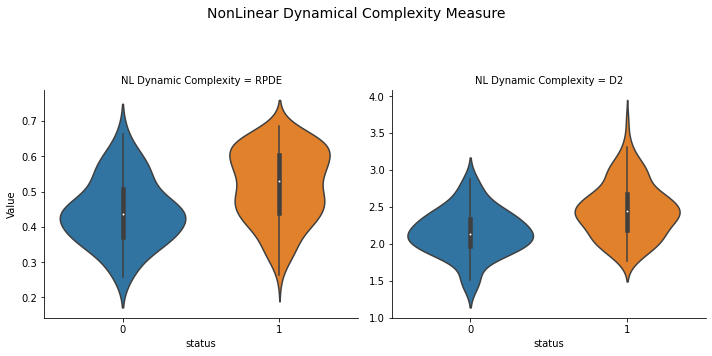

In [13]:
df2=df[['status','RPDE','D2']]
df2_mlt=pd.melt(df2,value_vars=['RPDE','D2'],var_name='NL Dynamic Complexity',value_name='Value',id_vars='status')
#display(df2_mlt.head(3))
g2=sns.catplot(kind='violin',x='status',y='Value',col='NL Dynamic Complexity',data=df2_mlt,sharey=False)
g2.fig.subplots_adjust(top=0.75)
t=g2.fig.suptitle('NonLinear Dynamical Complexity Measure',fontsize=14)

The above plot gives the distribution of **two nonlinear dynamical complexity measures**. The median values in both cases are higer than 0. In case of D2, 1-violinplot is located upish/above that of 0, denoting the values are generally higher in case of former.

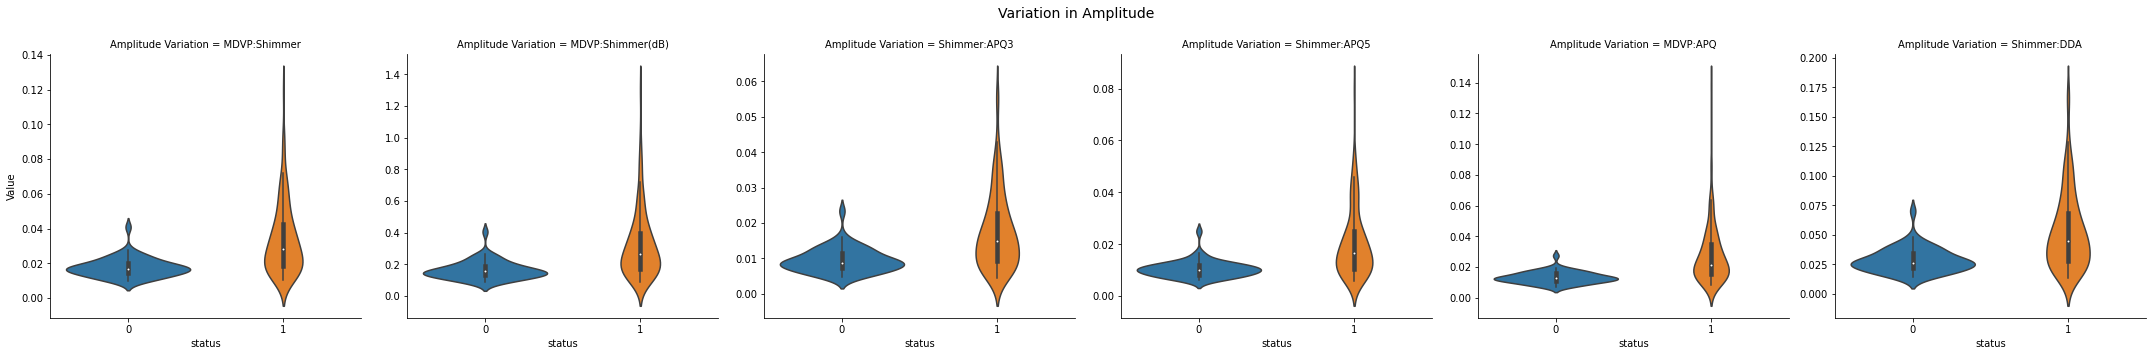

In [14]:
df2=df[['status','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA']]
df2_mlt=pd.melt(df2,value_vars=['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'],var_name='Amplitude Variation',value_name='Value',id_vars='status')
#display(df2_mlt.head(3))
g2=sns.catplot(kind='violin',x='status',y='Value',col='Amplitude Variation',data=df2_mlt,sharey=False)
g2.fig.subplots_adjust(top=0.85)
t=g2.fig.suptitle('Variation in Amplitude',fontsize=14)

The above plots depicts the distribution of **Several measures of variation in amplitude**. We see in all the measures, the variation of 1s are higher with many outliers present. The median values in 1s in all the cases are also greater then 0s.

In [15]:
df.drop(['name'],axis=1,inplace=True)

In [16]:
corr=df.corr()
(corr.style
 
 .background_gradient( cmap='Oranges'))


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


The above DataFrame denotes the correlation between different features. Darker the colors,higher the correlation. Eg: MDVP:RAP has high positive correlation of 0.95 with **MDVP:PPQ** . There are many other features which have high positive or negative correlations among them. It may give rise to the problem of multicollinearity while building restrictive ML models such as Linear/Logistic Regression. One way to deal with them is to combine them suitable or drop one of them if there is high correlation.

Some features have large range of values while others have very narrow range. Eg: **MDVP:Fhi(Hz)** has values from range 0-700 where as **RPDE** has range from between **0-1**. So to visualize all of their mean effectively in one plot and do good comparative analysis we standardize them all between **0-1** using **MinMaxScaler()**.

In [17]:
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
trans=st.fit_transform(df.drop('status',axis=1))
df_std=pd.DataFrame(trans)
df_std.columns=df.drop('status',axis=1).columns.tolist()
df_std['status']=df['status']

In [18]:
df_std.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,0.332627,0.347354,0.172448,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310,1
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,0.515986,0.535685,0.279424,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326,1
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,0.443374,0.446133,0.219848,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682,1
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,0.475539,0.466079,0.233785,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949,1
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,0.584553,0.577341,0.286852,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611,1


In [19]:
df_c.drop(['name'],axis=1).groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,0.009504,0.010509,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,0.017676,0.020285,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [20]:
df_mean_mlt=df_std.groupby('status').mean().reset_index().melt(id_vars='status')
df_mean_mlt.head()

,status,variable,value
0,0,MDVP:Fo(Hz),0.544936
1,1,MDVP:Fo(Hz),0.330949
2,0,MDVP:Fhi(Hz),0.248001
3,1,MDVP:Fhi(Hz),0.176157
4,0,MDVP:Flo(Hz),0.459033


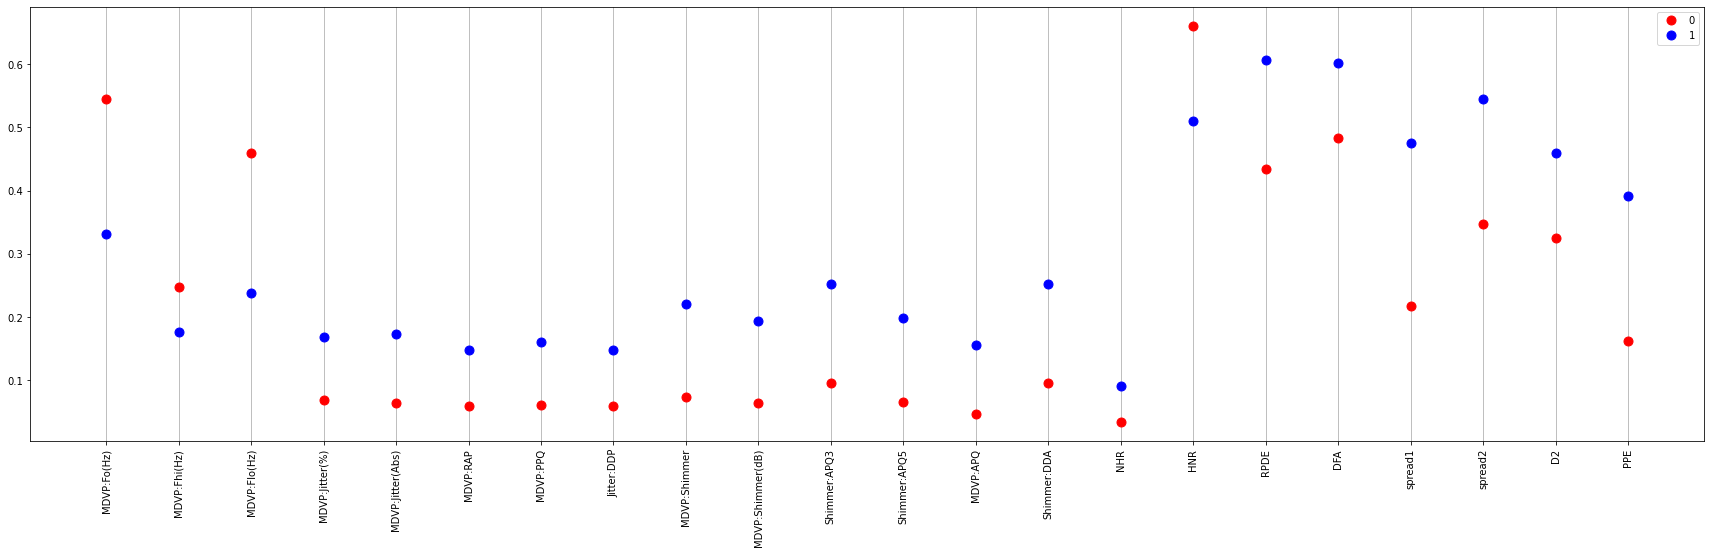

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.errorbar(x=df_mean_mlt.query('status==0')['variable'],y=df_mean_mlt.query('status==0')['value'],fmt='.r',markersize=18)
plt.errorbar(x=df_mean_mlt.query('status==1')['variable'],y=df_mean_mlt.query('status==1')['value'],fmt='.b',markersize=18)
plt.legend(['0','1'])
plt.grid(axis='x')
k=plt.xticks(rotation=90)

Aw we can see the mean values of features **MDVP.Fo(Hz), MDVP.Fhi(Hz), MDVP.Flo(Hz), HNR** are higher for 0s than 1s and for rest features it's the opposite.

# Statistical Analysis

The difference in means as visualized above can be due to random chance. To check if there is difference in mean between two distributions distributions. We will perform Statistical Test called **Hypothesis Testing** here. To test whether the distributions of two distributions have equal mean we will perform t-test here.

The assumption of t-test is that the two population/distribution has same variance, which can again be tested as Levene Test.

If two distributions have unqual variance then we will use Welch t-test instead.

**Levene Test:**

**H0(Null Hypothesis):** The two distributions have equal variance.
**HA(Alternate Hypothesis):** The two distributions have unequal variance.

**t-test(same for Welch T-test:**

**H0(Null Hypothesis):** The two distributions have equal mean.

**HA(Alternate Hypothesis):** The two distributions have unequal mean.

p-value is the probability that we observed our data given the null hypothesis is true.

p-value<0.05, we reject null hypothesis in favor of alternate hypothesis with 95% confidence level.

In [22]:
col_list=df.drop('status',axis=1).columns.tolist()
from scipy.stats import levene,ttest_ind
for i in col_list:
  _,p_val=levene(df.query('status==0')[i],df.query('status==1')[i])
 # print('col : {} , p_val_levene: {}'.format(i,p_val))
  if p_val<0.05:
     _,pval=ttest_ind(df.query('status==0')[i],df.query('status==1')[i],equal_var=False)
     if pval<0.05:
       print('Significant difference in means for ',i)
     else:
        print('Significant difference in meansfor ',i)
  else:
    
     _,pval=ttest_ind(df.query('status==0')[i],df.query('status==1')[i])
     if pval<0.05:
       print('No Significant difference in means for ',i)
     else:
        print('No Significant difference in meansfor ',i)

Significant difference in means for  MDVP:Fo(Hz)
No Significant difference in means for  MDVP:Fhi(Hz)
Significant difference in means for  MDVP:Flo(Hz)
Significant difference in means for  MDVP:Jitter(%)
Significant difference in means for  MDVP:Jitter(Abs)
Significant difference in means for  MDVP:RAP
Significant difference in means for  MDVP:PPQ
Significant difference in means for  Jitter:DDP
Significant difference in means for  MDVP:Shimmer
Significant difference in means for  MDVP:Shimmer(dB)
Significant difference in means for  Shimmer:APQ3
Significant difference in means for  Shimmer:APQ5
Significant difference in means for  MDVP:APQ
Significant difference in means for  Shimmer:DDA
Significant difference in means for  NHR
Significant difference in means for  HNR
No Significant difference in means for  RPDE
No Significant difference in means for  DFA
Significant difference in means for  spread1
No Significant difference in means for  spread2
No Significant difference in means for 

We plot the **normalized distribution** of our target variable, we see that the dataset is highly imbalanced with much higher number of **1 or Parkinson cases.**

**Imbalanced dataset** might make our prediction model biased towards the majority class so we need to take care of that.

# Building ML Model & Evaluating Performance

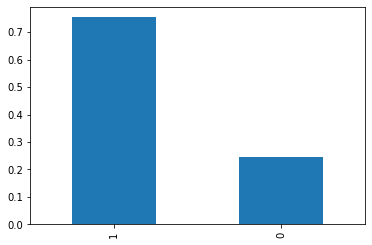

In [23]:
df['status'].value_counts(normalize=True).plot(kind='bar')

In [24]:
X=df.drop('status',axis=1)
y=df['status']

In [25]:
# We divide the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.21)

We decided to use tree based- model here because it has some advantages over linear models:

1. It can handle multicollinearity problem.
2. It can handle outliers so no need to standardize.
3. It's ensemble of many trees so it combines the prediction from many trees to give accurate results.

So basically this model had very few or none restrictions compared to Linear Models.




In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=47)
mod1=rf.fit(X_train,y_train)
pred_train1=mod1.predict(X_train)
pred_test=mod1.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report
print('Training accuracy ',accuracy_score(y_train,pred_train1))
print('Testing accuracy ',accuracy_score(y_test,pred_test))

Training accuracy  1.0
Testing accuracy  0.9512195121951219


In [27]:
rf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=47, verbose=0,
                       warm_start=False)

In [28]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        34

    accuracy                           0.95        41
   macro avg       0.97      0.86      0.90        41
weighted avg       0.95      0.95      0.95        41



First we will look the **oversampling techniques** where we oversample the minority class to have equal number of classes as the majority class.

First we will look at **SMOTE** technique which creates synthetic data of minority classes based on the neighbourbood minority class data.

In [29]:
!pip install smote_variants

In [30]:
import smote_variants as sv
import numpy as np
oversampler=sv.SMOTE()
X_train_o,y_train_o=oversampler.sample(np.array(X_train),np.array(y_train))

2020-08-07 14:11:14,643:INFO:SMOTE: Running sampling via ('SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [31]:
print('Count of 0 before oversampling: ',sum(y_train==0))
print('Count of 1 before oversampling: ',sum(y_train==1))
print('Count of 0 after oversampling: ',sum(y_train_o==0))

Count of 0 before oversampling:  41
Count of 1 before oversampling:  113
Count of 0 after oversampling:  113


In [32]:
model2=rf.fit(X_train_o,y_train_o)
pred_train_2=model2.predict(X_train_o)
pred_test2=model2.predict(X_test)
print('Training accuracy ',accuracy_score(y_train_o,pred_train_2))
print('Testing accuracy ',accuracy_score(y_test,pred_test2))

Training accuracy  1.0
Testing accuracy  0.926829268292683


In [33]:
print(classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.96        34

    accuracy                           0.93        41
   macro avg       0.89      0.84      0.86        41
weighted avg       0.92      0.93      0.92        41



After, SMOTE I will use **MSMOTE** technique where the minority class is classified into 3 distinct groups. Different strategies are adopted to generate minority points based on the group of each minority class.

In [34]:
oversampler=sv.MSMOTE()
X_train_os,y_train_os=oversampler.sample(np.array(X_train),np.array(y_train))

2020-08-07 14:11:14,881:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'n_jobs': 1, 'random_state': None}")


In [35]:
model3=rf.fit(X_train_os,y_train_os)
pred_tr=model3.predict(X_train_os)
pred_ts=model3.predict(X_test)
print('Training accuracy ',accuracy_score(y_train_os,pred_tr))
print('Testing accuracy ',accuracy_score(y_test,pred_ts))

Training accuracy  1.0
Testing accuracy  0.926829268292683


In [36]:
print(classification_report(y_test,pred_ts))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.94      0.97      0.96        34

    accuracy                           0.93        41
   macro avg       0.89      0.84      0.86        41
weighted avg       0.92      0.93      0.92        41



We will now use **undersampling** technique where we will undersample/downsample the majority class to number of minority class in the dataset.

In [37]:
trainData=pd.concat([X_train,y_train],axis=1)
ind=trainData[trainData['status']==0].index
print(len(ind))

41


In [38]:
minData=trainData.loc[ind]
print(minData.shape)

(41, 23)


In [39]:
ind_mj=trainData[trainData['status']==1].index
print(len(ind_mj))
majData=trainData.loc[ind_mj]
print(majData.shape)

113
(113, 23)


In [40]:
majSample=majData.sample(n=len(ind),random_state=123)
print(majSample.shape)

(41, 23)


In [41]:
bal_dta=pd.concat([minData,majSample],axis=0)

In [42]:
from sklearn.utils import shuffle
bal_dta=shuffle(bal_dta)

In [43]:
X_train_=bal_dta.drop('status',axis=1)
y_train_=bal_dta['status']
model4=rf.fit(X_train_,y_train_)
pred_trn=model4.predict(X_train_)
pred_tst=model4.predict(X_test)
print('Training accuracy ',accuracy_score(y_train_,pred_trn))
print('Testing accuracy ',accuracy_score(y_test,pred_tst))

Training accuracy  1.0
Testing accuracy  0.8780487804878049


In [44]:
print(classification_report(y_test,pred_tst))

              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.94      0.91      0.93        34

    accuracy                           0.88        41
   macro avg       0.78      0.81      0.80        41
weighted avg       0.89      0.88      0.88        41



We we can see from the classification report that in all the aspects(*accuracy, overfitting/underfitting criteria, precision, recall, f1 score*) **Random Forest Model** without any over or undersampling is performing better. Though in most of the  imbalanced class problem, suitable sampling techniques help, this one is one of the exception.

But it's always good to check everything/every scenario as done above before choosing the model.

Random Forest models enables us to observe the importance of each feature on building the prediction model.of importance of our original random forest model( i.e, without any sampling techniques). We chose that model as it performed the best.

Below a bar-graph of features is drawn in decreasing order of importance of our original random forest model( i.e, without any sampling techniques). We chose that model as it performed the best.

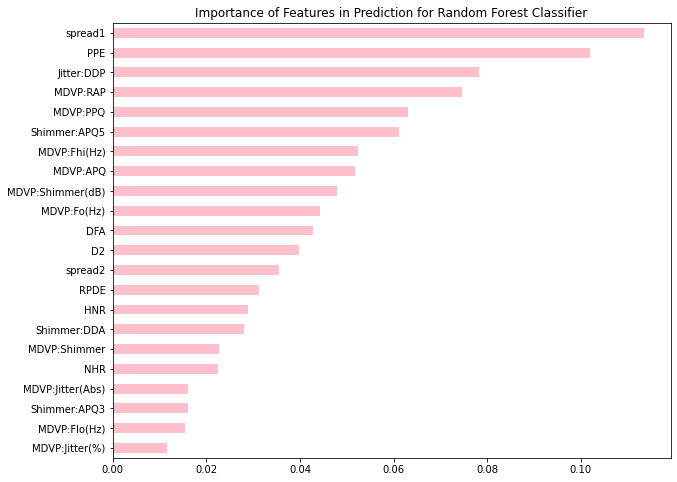

In [45]:
importance_f=pd.Series(mod1.feature_importances_,index=X_train.columns)
sort_imp_f=importance_f.sort_values()
sort_imp_f.plot(kind='barh',color='pink',figsize=(10,8),title='Importance of Features in Prediction for Random Forest Classifier')

We see that **PPE,spread1** are important features followed by others. Features like **MDVP.Flo(Hz), MDVP.Jitter(Abs)** have very less importance.

Another method of observing the importance of features in prediction is by **Variable Importance via Permutation**. Here we simply swap(permute) values of a column between different rows and then use these modified cases for prediction.We can compare the accuracy with original model to evaluate the importance of model. If both the plot have close results in identifying the important features we can say our model has done well.

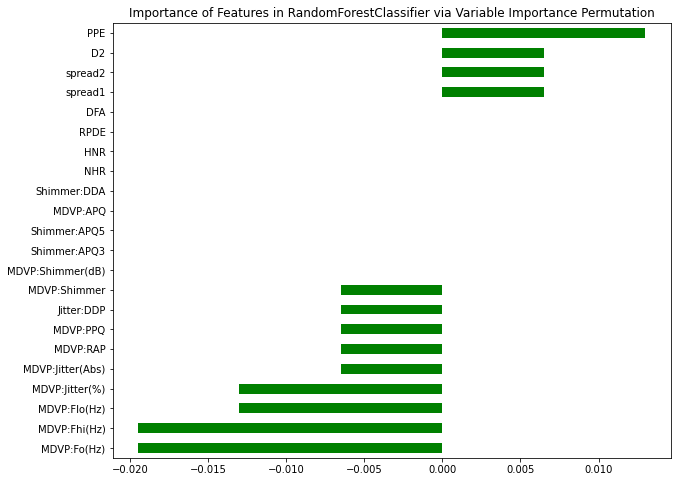

In [46]:
import pandas as pd
from mlxtend.evaluate import feature_importance_permutation
imp_val,_=feature_importance_permutation(predict_method=mod1.predict,X=np.array(X_train),y=np.array(y_train),metric='accuracy',num_rounds=1,seed=2)
varimp=pd.DataFrame(index=X_train.columns)
#varimp.index=X_test.columns
varimp['importance']=sorted(imp_val)
varimp.plot(kind='barh',color='green',figsize=(10,8),title='Importance of Features in RandomForestClassifier via Variable Importance Permutation',legend=False)

# Clustering Similar Data

Two features like **spread1, PPE** etc. have been at top of both the plots so these two feartures have really good contribution in prediction for the model. On the other hand, features like **MDVP:jitter(Abs), MDVP:jitter(%)** are at bottom part of both two plots so they are not important features.

So in this way by comparing two plots we can come out with important and useless features. 

We can perform clustering to see if we could custer the data based on similarity of the features This could be a crucial step to group data according to measures/symptoms so that we can study the people with different measures/symptoms and study them closely.

First we will use **K-Means Clustering Algorithm**

[141.73303491257704, 98.67535305891641, 77.60350713426746, 65.51799562554328, 59.06935270159779, 52.84122759652812, 48.99335241693156, 45.973769388898845, 43.453739985009165]


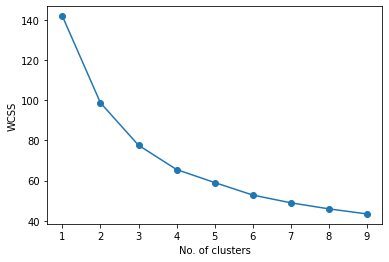

In [47]:
# We will use Within Cluster Sum of Squared method to choose optimal number of clusters. It's also called Elbow method. We will choose that number of cluster
# from where the WCSS score not decrease much.
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  kmeans=KMeans(i)
  kmeans.fit(df_std.drop('status',axis=1))
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss,'-o')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
print(wcss)

From the above plot **2,3,4** seems good. Let us narrow down the result to indeal number of cluster using some intrinsic cluster evaluation methods like **Silhoutte score, Calinski Harabasz score and Davies Bouldin Score**. 

In case of Silhouette score, higher the better. In case of Calinski Harabasz Score (-1 to 1 range], again higher the better(no range) and for last one closer the values to 0,the better. 

In [48]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score


In [49]:
for i in (2,3,4,5):
  kmean=KMeans(i,random_state=42)
  mod_k=kmean.fit(df_std)
  pred_k=mod_k.predict(df_std)
  kmean_sil=silhouette_score(df_std,pred_k,metric='euclidean')
  kmean_cal=calinski_harabasz_score(df_std,pred_k)
  kmean_dav=davies_bouldin_score(df_std,pred_k)
  print(i,'\t','Silhouette Score:' ,kmean_sil,',Calinski Harbasz Score: ',kmean_cal,',Davies Bouldin Score: ',kmean_dav)

2 	 Silhouette Score: 0.3472403476715295 ,Calinski Harbasz Score:  85.54229429430204 ,Davies Bouldin Score:  1.1425504308812875
3 	 Silhouette Score: 0.3131611225772371 ,Calinski Harbasz Score:  91.14286446163241 ,Davies Bouldin Score:  1.2417587507752323
4 	 Silhouette Score: 0.26946396600264066 ,Calinski Harbasz Score:  88.00375925619751 ,Davies Bouldin Score:  1.2543322278024271
5 	 Silhouette Score: 0.27804168053807254 ,Calinski Harbasz Score:  80.90151842284921 ,Davies Bouldin Score:  1.2281110165294922


Seeing the values 2 is the ideal number of cluster for this dataset.

Now we use another clustering technique called **Mean-Shift Clustering Technique**.

In [50]:
from sklearn.cluster import MeanShift
for i in (0.5,0.6,0.7,0.8,0.9):
  mean_s=MeanShift(i)
  mean_s.fit(df_std)
  pred_m=mean_s.predict(df_std)
  m_sil=silhouette_score(df_std,pred_m,metric='euclidean')
  m_cal=calinski_harabasz_score(df_std,pred_m)
  m_dav=davies_bouldin_score(df_std,pred_m)
  print(i,'\t','Silhouette Score:' ,m_sil,',Calinski Harbasz Score: ',m_cal,',Davies Bouldin Score: ',m_dav)

0.5 	 Silhouette Score: 0.20640712419090682 ,Calinski Harbasz Score:  32.30054770432986 ,Davies Bouldin Score:  0.8240484770728067
0.6 	 Silhouette Score: 0.21587651226080953 ,Calinski Harbasz Score:  29.771969355357562 ,Davies Bouldin Score:  0.8921966776979996
0.7 	 Silhouette Score: 0.24597216824865736 ,Calinski Harbasz Score:  32.00101048633143 ,Davies Bouldin Score:  0.9037052799729496
0.8 	 Silhouette Score: 0.2582654625564128 ,Calinski Harbasz Score:  29.13133829388262 ,Davies Bouldin Score:  0.7121496956961684
0.9 	 Silhouette Score: 0.3469133288555782 ,Calinski Harbasz Score:  45.39703263521986 ,Davies Bouldin Score:  1.0510363841158665


For none of the diameter values , the performance in better than KMeans clustering algorithm with number of clusters 2. So we reject MeanShift for this technique.

Earlier two were examples of ***flat clustering***. Now we will use **Hierarchical Clustering Technique.**

We will use **Agglomerative Hierarchical Clustering** here to group data into clusters.

We can visualize how data points are combined in one clusters using dendrogram shown below.The data points connected in the lower parts of the **dendrogram** are the closest to each other. The distance between points inceases as we go up.

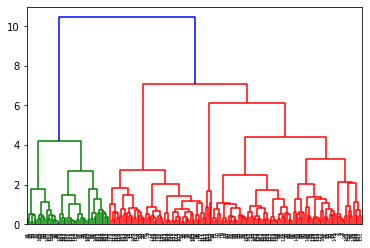

In [51]:
from scipy.cluster.hierarchy import dendrogram
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(df_std,method='ward'))

We chose to group features in the dataset using ward clustering here, which used the squared distance of the data points. The number of clusters from a dendrogram can be found out by drawing a horizontal line in the area with the highest vertical distance. So in this case it would be two clusters.

In [52]:
from sklearn.cluster import AgglomerativeClustering
for i in (2,3,4,5):
  agg_mod=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
  agg_mod.fit(df_std)
  #pred_A=agg_mod.predict(df_std)
  a_sil=silhouette_score(df_std,agg_mod.labels_,metric='euclidean')
  a_cal=calinski_harabasz_score(df_std,agg_mod.labels_)
  a_dav=davies_bouldin_score(df_std,agg_mod.labels_)
  print(i,'\t','Silhouette Score:' ,a_sil,',Calinski Harbasz Score: ',a_cal,',Davies Bouldin Score: ',a_dav)

2 	 Silhouette Score: 0.3472403476715295 ,Calinski Harbasz Score:  85.54229429430204 ,Davies Bouldin Score:  1.1425504308812875
3 	 Silhouette Score: 0.23826001289692944 ,Calinski Harbasz Score:  78.05074218967127 ,Davies Bouldin Score:  1.3374291624219694
4 	 Silhouette Score: 0.2559061953327484 ,Calinski Harbasz Score:  79.07664941686231 ,Davies Bouldin Score:  1.174494962273808
5 	 Silhouette Score: 0.2185018993757236 ,Calinski Harbasz Score:  73.6504855156756 ,Davies Bouldin Score:  1.3630318512043254


Indeed **2 clusters for Agglomeratice Clustering** yeilding better result.

The performance is same as KMeans Cluster with 2 clusters. We can use any one of them to cluster our data points. We use KMeans here.

In [53]:
kmean=KMeans(n_clusters=2,random_state=42)
mod_kk=kmean.fit(df_std)
pred_kk=mod_kk.predict(df_std)
df['pred_clust']=pred_kk

In [54]:
df['pred_clust'].unique()

array([1, 0], dtype=int32)

**TSNE** algorithm helps to visualize high dimensional dataset(dataset with many features) into 2D space.

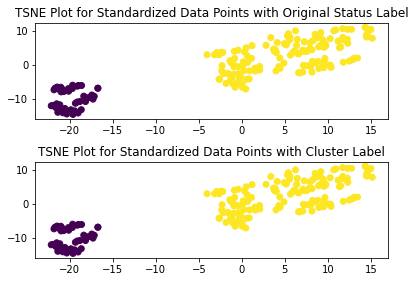

In [87]:
from sklearn.manifold import TSNE
model=TSNE(learning_rate=100,random_state=42)
transformed=model.fit_transform(df_std)
Xs=transformed[:,0]
Ys=transformed[:,1]


fig = plt.figure()

ax1=fig.add_subplot(2,1,1)

ax1.scatter(Xs,Ys,c=df['status'])
ax1.title.set_text('TSNE Plot for Standardized Data Points with Original Status Label')
ax2=fig.add_subplot(2,1,2)

ax2.scatter(Xs,Ys,c=df['pred_clust'])
ax2.title.set_text('TSNE Plot for Standardized Data Points with Cluster Label')

fig. tight_layout(pad=1.0)


The distribution of standardized point for status is same as the clusters obtained giving a hint that the clusters are formed according to whether the patients have Parkinson or not. The standardized feature values clearly tells the difference.

We can see from the above **TSNE Plot** that the datapoints are very well clustered into two groups and and if we compare the obtained cluster label for each point with status of each we will find that the clustering algorithm performed well in grouping the datapoints. So the features of data of two groups tells whether the person has Perkinson(1) or not.

We will perform some extrinsic methods to evaluate how well our clusters are formed by seeing if the algorithm has correctly classified the 1s and 0s into two groups.

The metrics we will use are:

a. **Adjusted Rand Index** , range [-1,1], higher the better.

b. **Adjusted Mutual Information**, range [-1,1], higher the better.

c. **V-Measure, Homogeneity, Completeness**, range [0,1], higher the better.

d. **Fowlkes-Mallow Score**, range[0,1], higher the better.




In [56]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score,homogeneity_score,completeness_score,v_measure_score,fowlkes_mallows_score
print('Adjusted Rand Index: ',adjusted_rand_score(df['status'],df['pred_clust']))
print('Adjusted Mutual Information: ',adjusted_mutual_info_score(df['status'],df['pred_clust']))
print('Homogeinity score: ',homogeneity_score(df['status'],df['pred_clust']))
print('Completeness score: ',completeness_score(df['status'],df['pred_clust']))
print('V- Measure: ',v_measure_score(df['status'],df['pred_clust']))
print('Fowlkes-Mallow-Score: ',fowlkes_mallows_score(df['status'],df['pred_clust']))

Adjusted Rand Index:  1.0
Adjusted Mutual Information:  1.0
Homogeinity score:  1.0
Completeness score:  1.0
V- Measure:  1.0
Fowlkes-Mallow-Score:  1.0


We see that all the metrics gave the perfect score so all the points have been correctly classified into two clusters acc. to **status**.

# Evaluating Individual DataPoint

In [57]:
!pip install lime

Sometimes, we need to analyze the features of a particular patient. He might be in critical condition so we need to examine them. The above plots for examining importance of features gave us the importance of features for overall model.

To examine that specifically for a d=particular datapoint(here a patient) we need to use the **LIME package** in python.

In [58]:
# Viewing the prediction result for a particular customer
from lime.lime_tabular import LimeTabularExplainer
lime_explainer=LimeTabularExplainer(np.array(X_train),feature_names=X_train.columns,class_names=[0,1],mode='classification')
ex=lime_explainer.explain_instance(X_test.iloc[10,:],mod1.predict_proba,num_features=22)
ex.show_in_notebook()

Above we plotted the detailed analysis for the **10th person** in our dataframe.

The leftmost plot says that the model predicts with 72% probability that the patient falls in class 1 ( have Parkinson ).

The middle plot gave the weight with which a particular feature contribute to the the class prediction. Eg: when **spread1** value is between -5.88 and -5.19 it has a weight of 0.06 of predicting class 1( class orange is denoted by orange color and 0 by blue as evident from first plot).

The final plot denotes by their color coding which features are contributing towards redicting which class and their values in the dataframe.